In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv(r'C:\Users\lenovo\Downloads\Pandas-DS-Tasks\Data\Data\Train.csv')
df_test = pd.read_csv(r'C:\Users\lenovo\Downloads\Pandas-DS-Tasks\Data\Data\Test.csv')

In [3]:
df_train.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00


In [4]:
df_train.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 624.4+ KB


In [6]:
df_test.isnull().sum()

area_type          0
availability       0
location           0
size               2
society          626
total_sqft         0
bath               7
balcony           69
price           1480
dtype: int64

In [7]:
missing_values = df_train.isnull().sum()
missing_values

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [8]:
## Find percent of data which is missing
total_cells = np.product(df_train.shape)
total_missing = missing_values.sum()

percent_missing = (total_missing/total_cells)*100
percent_missing

5.172672672672673

In [9]:
## There might be some flat which don't have balcony i.e value does not exist and keep as NaN
df_train['balcony'].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [22]:
## Bathroom cannot be empty or 0 so try to fill missing values
df_train['balcony'].median()

2.0

In [31]:
## Fill missing column balcony in train & test columns with NOt Available value coz it may be or may not exist
df_train.balcony.fillna('Not_Available', inplace=True)
df_test.balcony.fillna('Not_Available', inplace=True)

In [32]:
## Fill missing column of bath with its median 
df_train.bath.fillna(df_train.bath.median(), inplace=True)
df_test.bath.fillna(df_test.bath.median(), inplace=True)

In [45]:
## Fill missing column of size with its mode value
##df_train['size'].mode()
df_train['location'].fillna(df_train['location'].mode(), inplace=True)

In [46]:
df_train.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath               0
balcony            0
price              0
dtype: int64

In [11]:
## df_train['balcony'].fillna('Not Available', inplace='True')
# Evaluation :- np.sqrt(np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean())

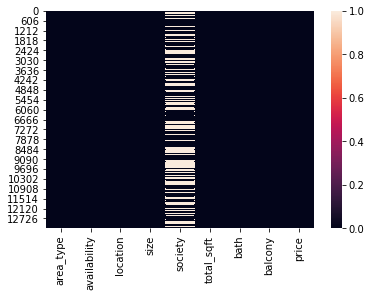

In [26]:
sns.heatmap(df_train.isnull())

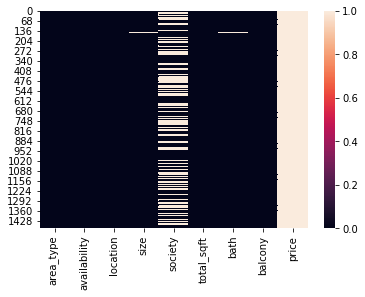

In [27]:
sns.heatmap(df_test.isnull())

In [14]:
## CHeck number of variable available under numerical_data
numerical_data = df_train.select_dtypes(exclude = [object])

In [15]:
## Correltaion between numerical variables
corr_matrix = numerical_data.corr()
corr_matrix

,bath,balcony,price
bath,1.000000,0.204201,0.456345
balcony,0.204201,1.000000,0.120355
price,0.456345,0.120355,1.000000


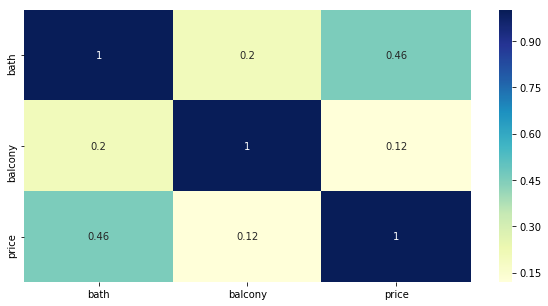

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')
plt.show()

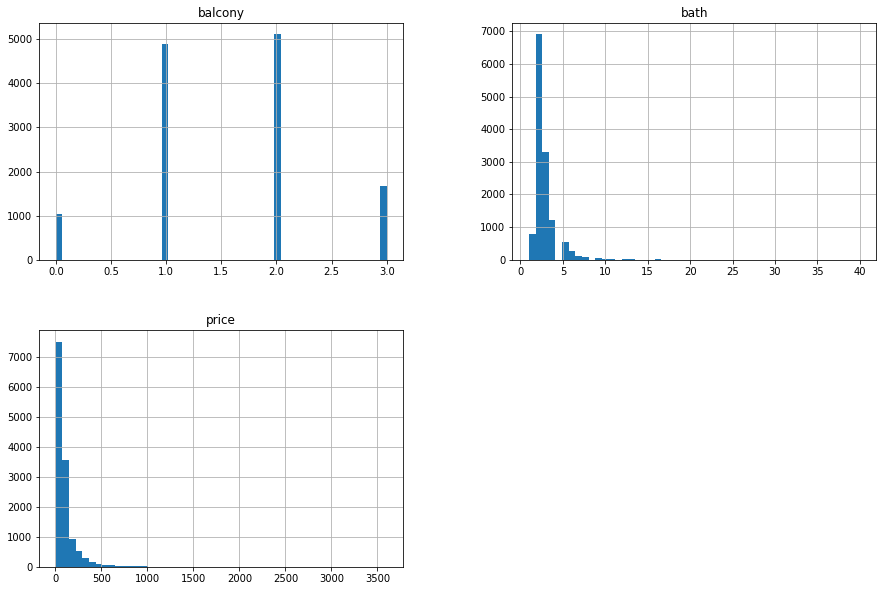

In [17]:
df_train.hist(bins=50, figsize=(15,10))
plt.show()

In [18]:
df_train_new = df_train.drop(columns='society')
df_test_new = df_test.drop(columns='society')